# Python for Data Analysis -  Final Project

# Online Shoppers Purchasing Intention 🛒

##### Submitted by:- Manisha RAWLA, Shubham SAINI, Alina TENNE

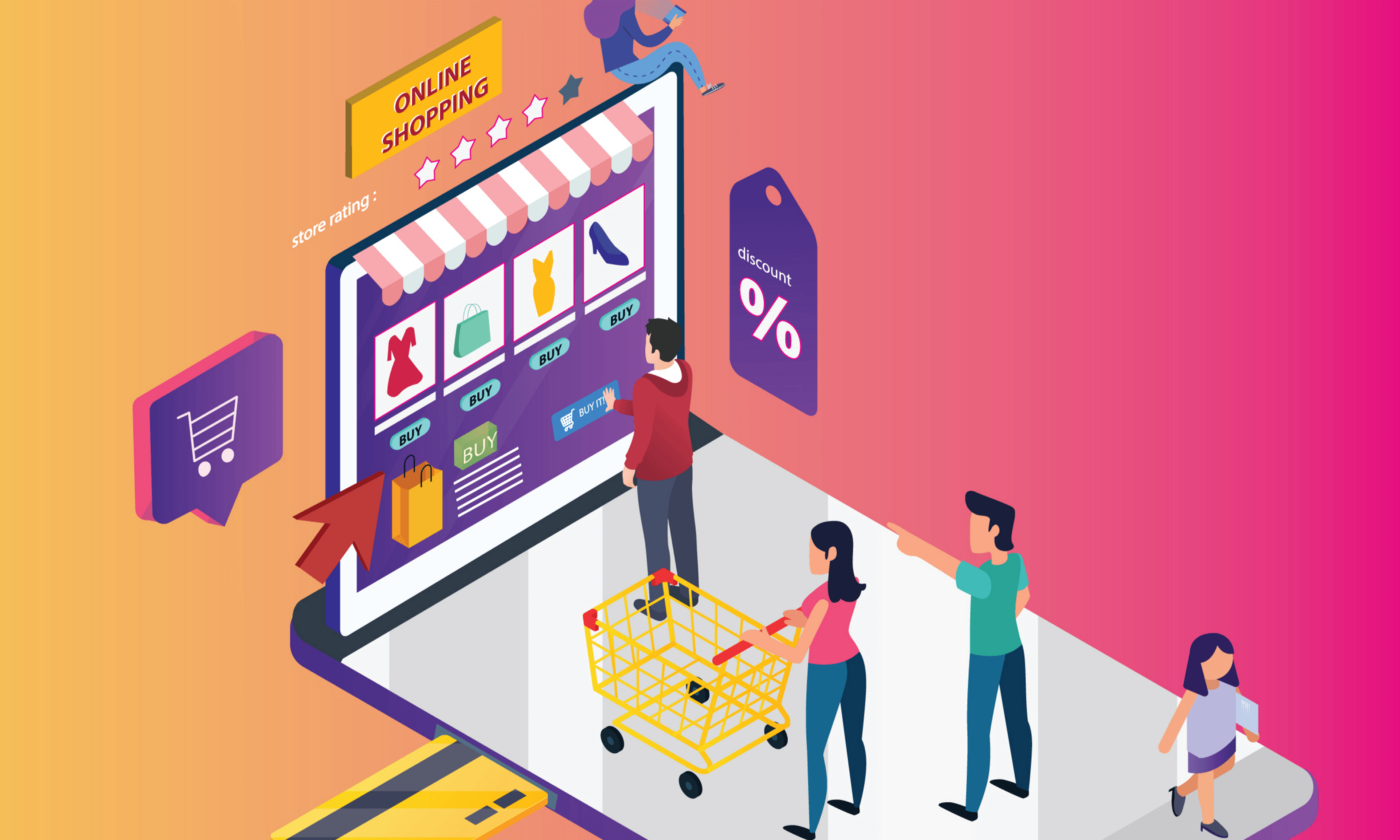

## Data Description : 
####This dataset is made up of various feature vectors from 12,330 sessions. Details of this dataset: To avoid any tendency to a particular campaign, special day, user profile, or time, it was created so that each session would belong to a different user throughout the course of a year. 84,5% of the 12 330 sessions in the dataset were negative class samples that did not result in shopping, while the remaining were positive class samples that did.

## Project Objective : 🥅
####The main objective of this project is to analyze the dataset, visualize it using various libraries (such as Matplotlib, Seaborn, and Bokeh), and model it to create a machine learning classification system that can predict an online shopper's intention (to buy or not to buy), based on the values of the given features, using libraries like Scikit-Learn through the use of multiple algorithms and comparing between them. The model will then be converted into a Django API so that it may be appropriately shown through it.

## Import Dataset and Libraries 📚

In [1]:
# Data Analysis and visualization tools
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import plotly as py
import plotly.graph_objs as go

#statistics tools
import statsmodels.api as sm
import scipy.stats as st
from scipy.stats import shapiro, mannwhitneyu, chi2_contingency

#scikit learn framework
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings('ignore')

In [2]:
url = 'https://raw.githubusercontent.com/shubhamsaini20/Python_data/main/online_shoppers_intention.csv'
df = pd.read_csv(url)
df.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
df.tail(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


In [4]:
df.shape

(12330, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

#### Month and VisitorType are object type, we can quickly check if there is any missing values by counting the values.

In [6]:
print(df['Month'].value_counts())
print(df['VisitorType'].value_counts())

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64


In [7]:
for name in df.columns:
  print(f"{name}: {df[name].unique()} \n")

Administrative: [ 0  1  2  4 12  3 10  6  5  9  8 16 13 11  7 18 14 17 19 15 24 22 21 20
 23 27 26] 

Administrative_Duration: [  0.         53.         64.6       ... 167.9107143 305.125
 150.3571429] 

Informational: [ 0  1  2  4 16  5  3 14  6 12  7  9 10  8 11 24 13] 

Informational_Duration: [  0.   120.    16.   ... 547.75 368.25 211.25] 

ProductRelated: [  1   2  10  19   0   3  16   7   6  23  13  20   8   5  32   4  45  14
  52   9  46  15  22  11  12  36  42  27  90  18  38  17 128  25  30  21
  51  26  28  31  24  50  96  49  68  98  67  55  35  37  29  34  71  63
  87  40  33  54  64  75  39 111  81  61  47  44  88 149  41  79  66  43
 258  80  62  83 173  48  58  57  56  69  82  59 109 287  53  84  78 137
 113  89  65  60 104 129  77  74  93  76  72 194 140 110 132 115  73 328
 160  86 150  95 130 151 117 124 127 125 116 105  92 157 154 220 187 112
 131 159  94 204 142 206 102 313 145  85  97 198 181 126 106 101 108 119
  70 122  91 276 100 291 114 172 217 141 133 156 136

In [8]:
print(df.isnull().sum())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


#### As we have seen before on the Data Types section, the Revenue & Weekend features are boolean, we will then transform then into binary so that we can easily use them in our calculations later on.

In [9]:
df.Revenue = df.Revenue.astype('int')
df.Weekend = df.Weekend.astype('int')

#### Let's now check if our changes were done properly :

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

## Data Visualisation 🎴

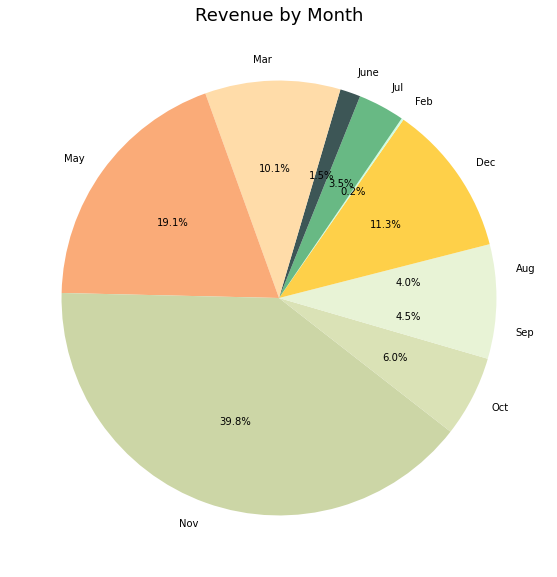

In [11]:
plt.figure(figsize=(10,10))
sums = df.Revenue.groupby(df.Month).sum()
colors = ['#E8F3D6', '#FED049', '#CFFDE1', '#68B984', '#3D5656', '#FFDCA9', '#FAAB78', '#CCD6A6', '#DAE2B6']
plt.title("Revenue by Month", size =18)
plt.pie(sums, labels=sums.index, colors = colors, autopct='%1.1f%%')
plt.show()

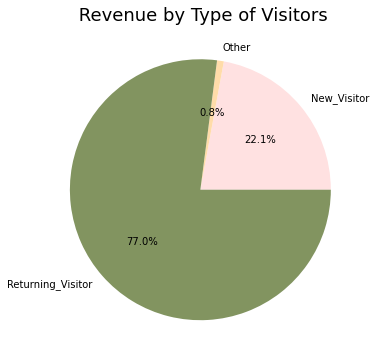

In [12]:
plt.figure(figsize=(6,6))
sums1 = df.Revenue.groupby(df.VisitorType).sum()
colors = ['#FFE1E1', '#FFDCA9', '#829460']
plt.title(" Revenue by Type of Visitors", size = 18)
plt.pie(sums1, labels=sums1.index, colors = colors, autopct='%1.1f%%')
plt.show()

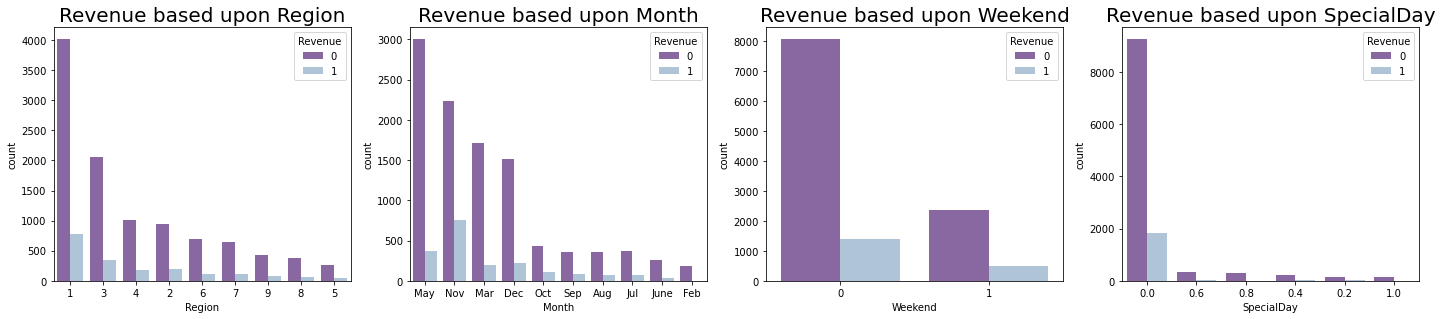

In [13]:
# figures regional and time-related features against revenue
features =['Region','Month','Weekend','SpecialDay']  
plt.figure(figsize=(50,55))
number = 0
for feature in features:
    number = number + 1
    ax = plt.subplot(10, 8, number,adjustable='datalim')
    sns.countplot(df[feature],hue=df['Revenue'],
                  order = df[feature].value_counts(ascending=False).index,  palette = "BuPu_r")
    ax.set_title('Revenue based upon'+ " " + feature, size = 20)

<AxesSubplot:>

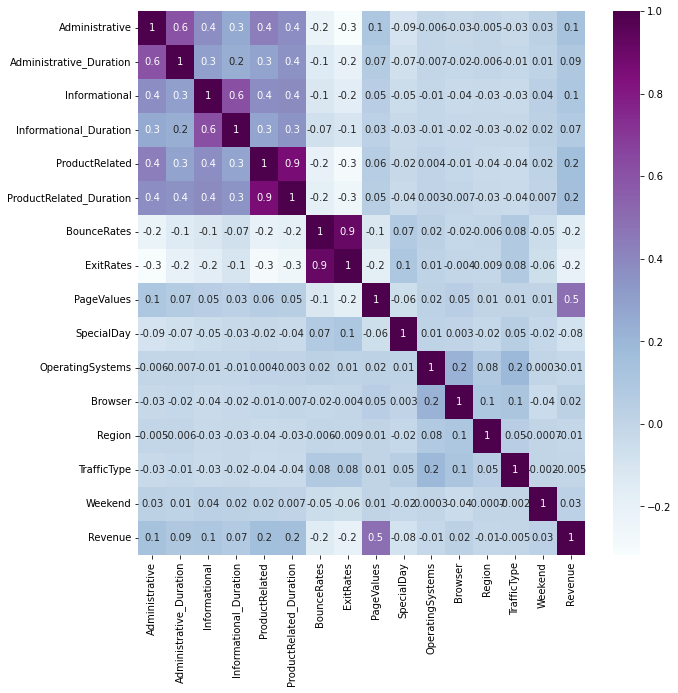

In [14]:
# bivariate correlations for all our columns
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.1g',cmap='BuPu')

#### Highlights of the patterns shown in the correlation heatmap below include the fact that revenue has an inverse relationship with bounce and exit rates and is substantially positively connected with the average number of pages visited (r = 0.5). Additionally, as anticipated, the number of product-related pages visited by the user (r = 0.2) is the one earning the highest revenue out of the administrative, informative, and administrative pages.

Text(0.89, 2100, '1908')

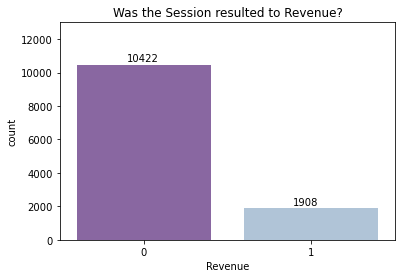

In [15]:
# plot of our output variable
revenue_plot = sns.countplot(df['Revenue'],  palette = "BuPu_r").set(title='Was the Session resulted to Revenue?')
plt.ylim(0,13000)
plt.text(x=-.100, y=10700 ,s=df['Revenue'].value_counts()[0])
plt.text(x=.890, y=2100, s=df['Revenue'].value_counts()[1])

#### The countplot above shows that the majority of the online session did not result in a consumer purchase. In particular, only 1908 of the 12330 online sessions resulted in income, indicating a class imbalance that might generate bias against the dominant class when our models are developed.

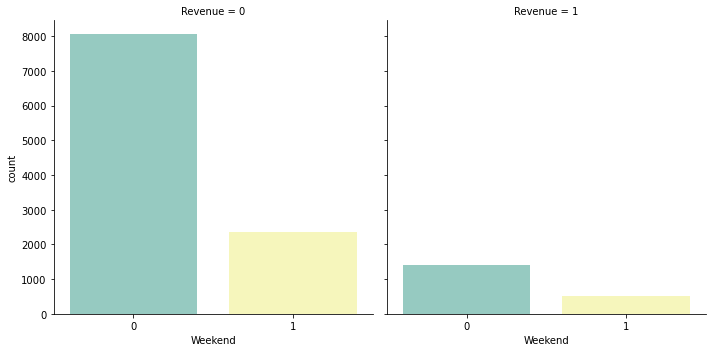

In [16]:
sns.catplot(x="Weekend", col="Revenue", data=df, kind="count", palette="Set3")
plt.show()

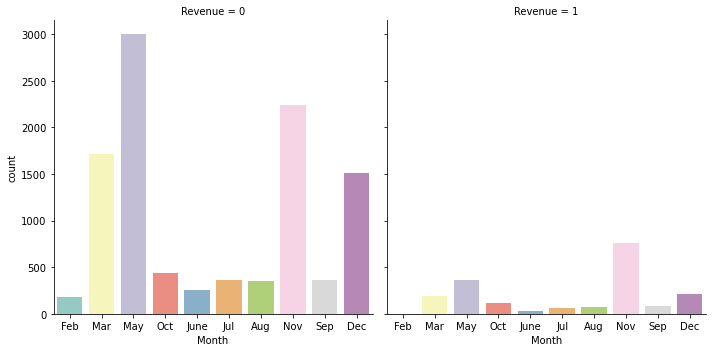

In [17]:
sns.catplot(x="Month", col="Revenue", data=df, kind="count", palette="Set3")
plt.show()

#### Let's now show some correlations graphic among a few of our features :

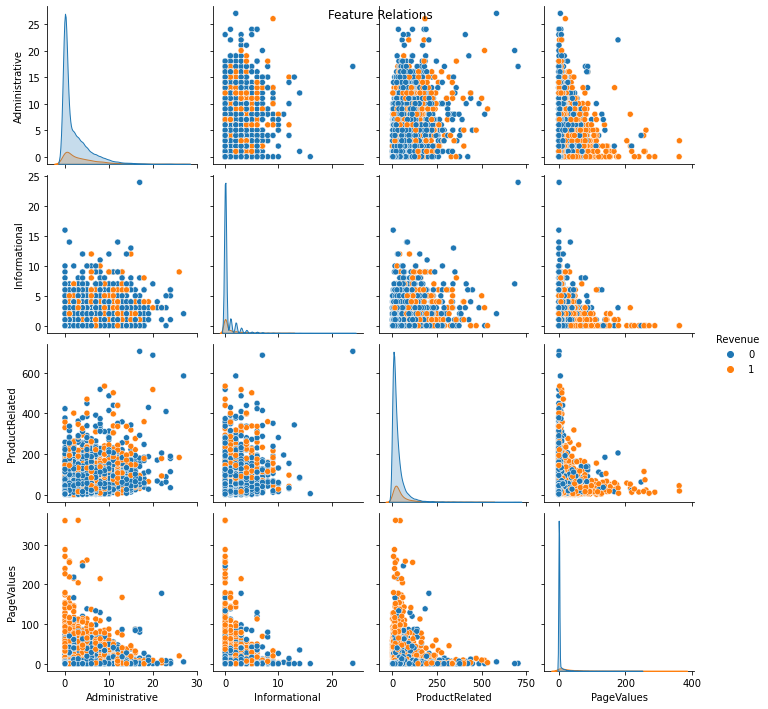

In [18]:
g1 = sns.pairplot(df[['Administrative', 'Informational', 'ProductRelated', 'PageValues', 'Revenue']], hue='Revenue')
g1.fig.suptitle('Feature Relations')
plt.show()

#### We can see from the above figure that there is a strong negative correlation between PageValues and the other features shown and no strong correlation between Revenue (our target) and any other feature.

#### Visit Date Analysis :

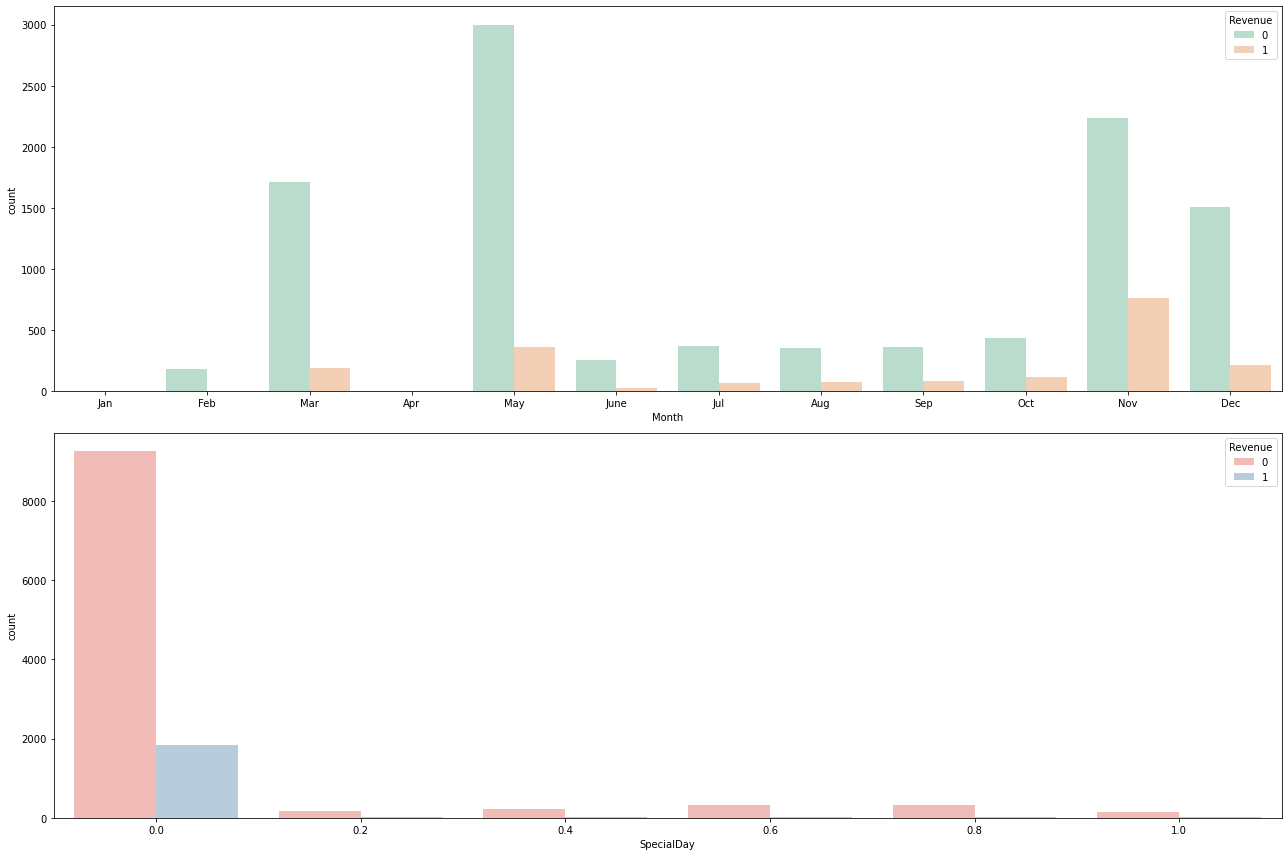

In [19]:
fig = plt.figure(figsize=(18, 12))

ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

orderlist = ['Jan','Feb','Mar','Apr','May','June','Jul','Aug','Sep','Oct','Nov','Dec']
sns.countplot(data=df, x='Month', hue='Revenue', ax=ax1, order=orderlist, palette = 'Pastel2')
sns.countplot(data=df, x='SpecialDay', hue='Revenue', ax=ax2, palette = 'Pastel1')

plt.tight_layout()
plt.show()


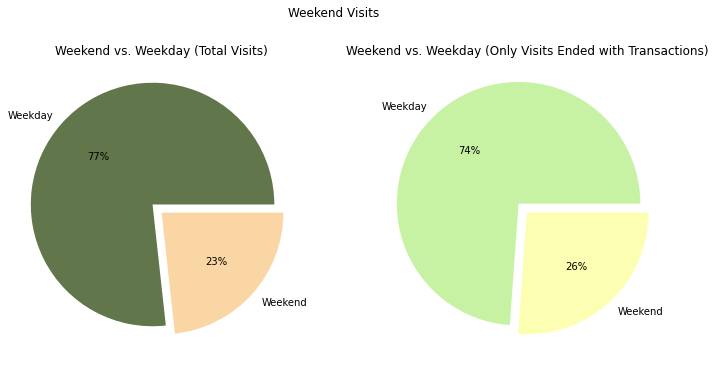

In [20]:
fig, ax = plt.subplots(1, 2,figsize=(12, 6), subplot_kw=dict(aspect="equal"))
ax[0].pie(df['Weekend'].value_counts(),explode=(0.1,0),labels=['Weekday','Weekend'], autopct='%1.0f%%', colors = ['#61764B', '#FAD6A5'])
ax[0].set_title('Weekend vs. Weekday (Total Visits)')
ax[1].pie(df[df['Revenue'] == 1]['Weekend'].value_counts(),explode=(0.1,0),labels=['Weekday','Weekend'], autopct='%1.0f%%', colors = ['#C7F2A4', '#FCFFB2'])
ax[1].set_title('Weekend vs. Weekday (Only Visits Ended with Transactions)')
fig.suptitle('Weekend Visits')
plt.show()

* On March and May, we have a lot of visits (May is the month with the highest number of visits), yet transactions made during those 2 months are not on the same level.
* We have no visits at all during Jan nor Apr.
* Most transactions happen during the end of the year, with Nov as the month with the highest number of confirmed transactions.
* The closer the visit date to a special day (like black Friday, new year's, ... etc) the more likely it will end up in a transaction.
* Most of transactions happen on special days (SpecialDay =0).
* It does not look like weekends affect the number of visits or transactions much, we can see only a slight increase in the number of transactions happening on weekends compared to those on weekdays.

## Univariate Analysis with Visualization : 
### Revenue

In [21]:
df['Revenue'].value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

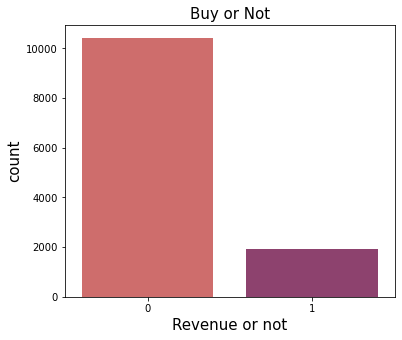

In [22]:
# checking the Distribution of customers on Revenue

plt.rcParams['figure.figsize'] = (13, 5)

plt.subplot(1, 2, 1)
sns.countplot(df['Revenue'], palette = 'flare')
plt.title('Buy or Not', fontsize = 15)
plt.xlabel('Revenue or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.show()

### Weekend

In [23]:
df['Weekend'].value_counts()

0    9462
1    2868
Name: Weekend, dtype: int64

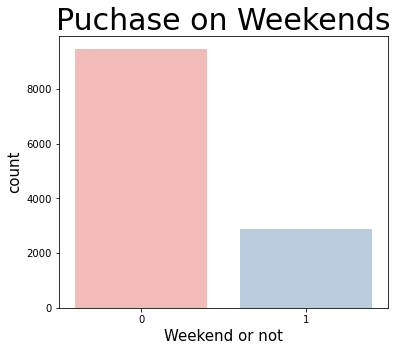

In [24]:
# checking the Distribution of customers on Weekend

plt.rcParams['figure.figsize'] = (13,5)
plt.subplot(1, 2, 2)
sns.countplot(df['Weekend'], palette = 'Pastel1')
plt.title('Puchase on Weekends', fontsize = 30)
plt.xlabel('Weekend or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)

plt.show()

From the above information we see that the distribution of Revenue and Weekend data are hightly imbalanced.

### Operating Systems

In [25]:
# checking the no. of Os's is having
df['OperatingSystems'].value_counts()

2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

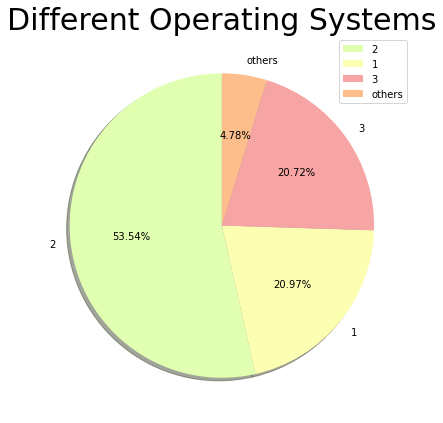

In [26]:
# plotting a pie chart for Operating Systems

plt.rcParams['figure.figsize'] = (18, 7)
size = [6601, 2585, 2555, 589]
colors = ['#E1FFB1', '#FCFFB2', '#F7A4A4', '#FEBE8C']
labels = "2", "1", "3", "others"

plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%', startangle=90)
plt.title('Different Operating Systems', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

Top 3 Operating Systems are covered 95% of this dataset. So we should focus on them to increase our business.

## Bi-Variate Analysis with Visualization

#### Administrative duration vs Revenue

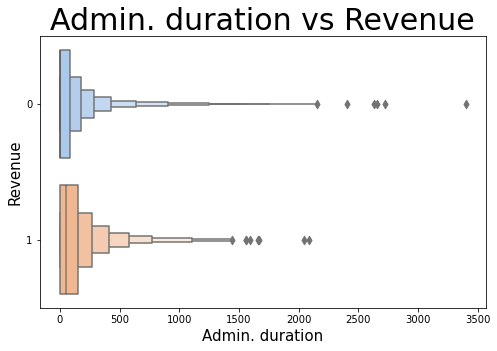

In [27]:
# boxenplot for Administrative duration vs revenue
plt.rcParams['figure.figsize'] = (8, 5)

sns.boxenplot(df['Administrative_Duration'], df['Revenue'], palette = 'pastel', orient='h')
plt.title('Admin. duration vs Revenue', fontsize = 30)
plt.xlabel('Admin. duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()

* We see here Administrative_Duration is exponentially distributed for both purchased(True) or not puchased(False).
* We also see there are so many outliers in not puchased(False) according to Administrative_Duration.

## Informational duration vs Revenue

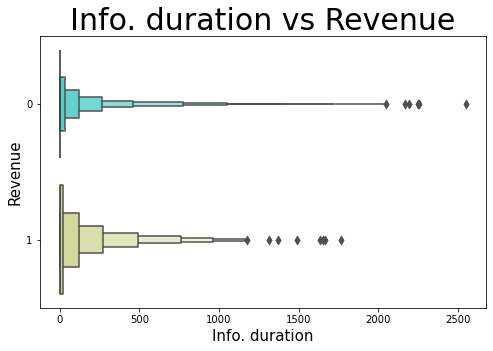

In [28]:
# boxenplot for Informational duration vs revenue
plt.rcParams['figure.figsize'] = (8, 5)

sns.boxenplot(df['Informational_Duration'], df['Revenue'], palette = 'rainbow', orient = 'h')
plt.title('Info. duration vs Revenue', fontsize = 30)
plt.xlabel('Info. duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

plt.show()


 We see here Informational_Duration is exponentially distributed for both purchased(True) or not puchased(False).
We also see there are so many outliers in not puchased(False) according to Informational_Duration.

#### Product Related Duration vs Revenue

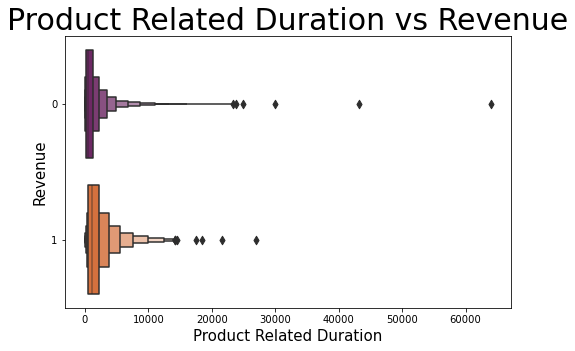

In [29]:
# boxen plot product related duration vs revenue
plt.rcParams['figure.figsize'] = (8, 5)

sns.boxenplot(df['ProductRelated_Duration'], df['Revenue'], palette = 'inferno', orient = 'h')
plt.title('Product Related Duration vs Revenue', fontsize = 30)
plt.xlabel('Product Related Duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()

We see here ProductRelatedDuration is exponentially distributed for both purchased(True) or not puchased(False).
We also see there are so many outliers in not puchased(False) according to ProductRelatedDuration.

Page Values vs Revenue

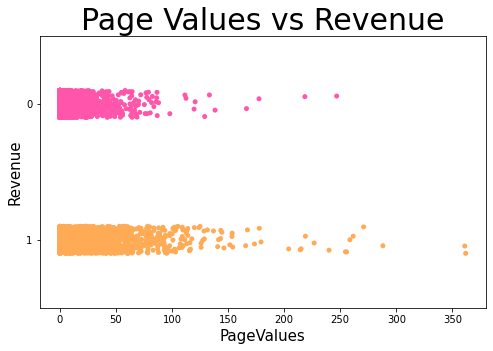

In [30]:
# strip plot for page values vs revenue
plt.rcParams['figure.figsize'] = (8, 5)

sns.stripplot(df['PageValues'], df['Revenue'], palette = 'spring', orient = 'h')
plt.title('Page Values vs Revenue', fontsize = 30)
plt.xlabel('PageValues', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()

We see here PageValues is exponentially distributed for both purchased(True) or not puchased(False).
We also see there are so many outliers in puchased(True) according to ExitRates.
Most important things is here PageValues are highly influenced to purchased(True) a product.

## Model Building:

#### Now that we have done some visualizations, we can process our DataFrame to format the data in order to apply classification algorithms on it.

In [31]:
dff = pd.concat([df,pd.get_dummies(df['Month'], prefix='Month')], axis=1).drop(['Month'],axis=1)
dff = pd.concat([dff,pd.get_dummies(dff['VisitorType'], prefix='VisitorType')], axis=1).drop(['VisitorType'],axis=1)
print(dff.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12330 non-null  int64  
 1   Administrative_Duration        12330 non-null  float64
 2   Informational                  12330 non-null  int64  
 3   Informational_Duration         12330 non-null  float64
 4   ProductRelated                 12330 non-null  int64  
 5   ProductRelated_Duration        12330 non-null  float64
 6   BounceRates                    12330 non-null  float64
 7   ExitRates                      12330 non-null  float64
 8   PageValues                     12330 non-null  float64
 9   SpecialDay                     12330 non-null  float64
 10  OperatingSystems               12330 non-null  int64  
 11  Browser                        12330 non-null  int64  
 12  Region                         12330 non-null 

In [32]:
dff.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [33]:
dff.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,...,0,0,0,0,0,0,0,0,0,1
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,...,0,0,0,0,1,0,0,0,0,1
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,...,0,0,0,0,1,0,0,0,0,1
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,...,0,0,0,0,1,0,0,0,0,1
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,...,0,0,0,0,1,0,0,1,0,0


### Splitting the Dataset :
We will split the dataset so that we have the following subsets :

* Train data (X_train) and trin labels (y_train) ==> 70%
* Validation data (X_val) and validation labels (y_val) ==> 15%
* Test data (X_test) and test labels (y)test) ==> 15%

In [34]:
y = dff['Revenue']
X = dff.drop(['Revenue'], axis=1)

In [35]:
X_train, X_valtest, y_train, y_valtest = train_test_split(X, y, test_size=0.3, random_state=101)
X_val, X_test, y_val, y_test = train_test_split(X_valtest, y_valtest, test_size=0.5, random_state=101)

In [36]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

Xsc_train = sc_X.fit_transform(X_train)
Xsc_val = sc_X.fit_transform(X_val)
Xsc_test = sc_X.fit_transform(X_test)

## Support Vector Machine
#### This classifier is known for separarating data points using a hyperplane with the largest amount of margin. The SVM used in this project using scikit-learn library finds an optimal hyperplane which helps in classifying new data points.

In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
svm = SVC(C=1.0,kernel='rbf',degree=3,gamma='auto') #default values
svm.fit(Xsc_train,y_train)
svm_pred = svm.predict(Xsc_val)

print('SVM Initial Performance:')
print('------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, svm_pred))
print('F1 Score        : ', metrics.f1_score(y_val, svm_pred))
print('Precision       : ', metrics.precision_score(y_val, svm_pred))
print('Recall          : ', metrics.recall_score(y_val, svm_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, svm_pred))

SVM Initial Performance:
------------------------
Accuracy        :  0.8875067604110329
F1 Score        :  0.5856573705179283
Precision       :  0.7577319587628866
Recall          :  0.4772727272727273
Confusion Matrix:
  [[1494   47]
 [ 161  147]]


We can see that SVM's initial model have a pretty good initial performance based on the metrics that we've used. 

### Logistic Regression :
Logistic Regression is known to measure the relationship between the categorical dependant variable and the independant variables by estimating probabilities using logistic function.

In [38]:
from sklearn.linear_model import LogisticRegression
lrm = LogisticRegression(C=1.0,solver='lbfgs',) 
lrm.fit(X_train,y_train)
lrm_pred = lrm.predict(X_val)

print('Logistic Regression initial Performance:')
print('----------------------------------------')
print('Accuracy        : ', metrics.accuracy_score(y_val, lrm_pred))
print('F1 Score        : ', metrics.f1_score(y_val, lrm_pred))
print('Precision       : ', metrics.precision_score(y_val, lrm_pred))
print('Recall          : ', metrics.recall_score(y_val, lrm_pred))
print('Confusion Matrix:\n ', confusion_matrix(y_val, lrm_pred))

Logistic Regression initial Performance:
----------------------------------------
Accuracy        :  0.8788534342888048
F1 Score        :  0.5313807531380752
Precision       :  0.7470588235294118
Recall          :  0.41233766233766234
Confusion Matrix:
  [[1498   43]
 [ 181  127]]


# API SERVER

In [39]:
!pip install jupyter-dash

In [48]:
# Importing for API
import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output# Load Data

In [49]:
df = px.data.tips()
app = JupyterDash(__name__)
app

In [50]:
app.run_server(mode='external')

Dash app running on http://127.0.0.1:8050/


In [51]:
! pip install pyngrok


In [52]:
! ngrok authtoken 2ILjkoxziR3wECicSbCoCUKX51J_28EkDz3PjaBxxa37Xk5GH

Authtoken saved to configuration file: C:\Users\SHUBHAM SAINI/.ngrok2/ngrok.yml


In [53]:
from pyngrok import ngrok

public_url = ngrok.connect(port = '8050')

In [54]:
 public_url


<NgrokTunnel: "http://e12f-89-30-29-68.ngrok.io" -> "http://localhost:80">

In [55]:
ngrok.kill()